## MULTI LAYERED PERCEPTRON USING KERAS

In [1]:
import os
from pathlib import Path
import pandas as pd
#getting my datasets
ml6 = pd.read_csv("train.csv")
ml62 = pd.read_csv("test.csv")
import warnings
warnings.filterwarnings('ignore')

In [2]:
ml6.shape

(22646, 80)

In [3]:
ml6["Label"].value_counts()

0     18245
4      1813
10     1302
2       990
3        73
7        69
6        45
5        36
11       35
1        17
12       16
14        5
Name: Label, dtype: int64

In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation

# Generate dummy training dataset
x_train = ml6.sample(frac = 0.5)
target1=x_train["Label"]
y_train = target1

# Generate dummy validation dataset
x_val = ml6.sample(frac = 0.2)
target2=x_val["Label"]
y_val = target2

# Generate dummy test dataset
x_test = ml6.sample(frac = 0.3)
target3=x_test["Label"]
y_test = target3

#Define the model architecture
model = Sequential()
model.add(Dense(72, input_dim=80,activation = "relu")) #Layer 1
model.add(Dense(64,activation = "relu"))               #Layer 2
model.add(Dense(36,activation = "relu"))               #Layer 3
model.add(Dense(28,activation = "relu"))                #Layer 4
model.add(Dense(12,activation = "relu"))                #Layer 5
model.add(Dense(8,activation = "relu"))       
model.add(Dense(1,activation = "sigmoid"))             #Output Layer

#Configure the model
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

#Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val,y_val))


Epoch 1/10
177/177 [==============================] - 2s 4ms/step - loss: -17061245952.0000 - accuracy: 0.0672 - val_loss: -155887190016.0000 - val_accuracy: 0.0945
Epoch 2/10
177/177 [==============================] - 0s 2ms/step - loss: -9630113595392.0000 - accuracy: 0.1056 - val_loss: -45332662583296.0000 - val_accuracy: 0.1106
Epoch 3/10
177/177 [==============================] - 0s 2ms/step - loss: -360707325427712.0000 - accuracy: 0.1138 - val_loss: -1168169767010304.0000 - val_accuracy: 0.1106
Epoch 4/10
177/177 [==============================] - 0s 3ms/step - loss: -4583068333506560.0000 - accuracy: 0.1100 - val_loss: -11292063874154496.0000 - val_accuracy: 0.1183
Epoch 5/10
177/177 [==============================] - 0s 2ms/step - loss: -29295185947000832.0000 - accuracy: 0.1113 - val_loss: -59239775244124160.0000 - val_accuracy: 0.1058
Epoch 6/10
177/177 [==============================] - 0s 3ms/step - loss: -121562503783120896.0000 - accuracy: 0.1118 - val_loss: -21927024380

In [5]:
#Make predictions from the trained model
predictions = model.predict(x_test)

213/213 [==============================] - 0s 1ms/step


In [6]:
predictions

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

# Decision trees

### Decision trees with given dataset

In [7]:
import os
from pathlib import Path
import pandas as pd
#getting my datasets
dt = pd.read_excel("dtdata.xlsx")
import warnings
warnings.filterwarnings('ignore')

In [8]:
dt

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31-40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31-40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


### Using user defined functions:

In [28]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

In [29]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
                
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [30]:
X = dt.iloc[:, :-1].values
y = dt.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

[Text(0.5, 0.8333333333333334, 'credit_rating <= 0.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.25, 0.5, 'age <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.5, 'student <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

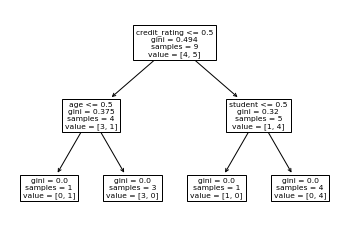

In [31]:
from sklearn import tree
tree.plot_tree(dtree, feature_names=features)

### Using in-built functions:

In [9]:
dt["buys_computer"].value_counts()

yes    9
no     5
Name: buys_computer, dtype: int64

In [10]:
dt["credit_rating"].value_counts()

fair         8
excellent    6
Name: credit_rating, dtype: int64

In [11]:
dt["student"].value_counts()

no     7
yes    7
Name: student, dtype: int64

In [12]:
dt["income"].value_counts()

medium    6
high      4
low       4
Name: income, dtype: int64

In [13]:
dt["age"].value_counts()

<=30     5
>40      5
31-40    4
Name: age, dtype: int64

In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dt['age']= label_encoder.fit_transform(dt['age'])
dt['income']= label_encoder.fit_transform(dt['income'])
dt['student']= label_encoder.fit_transform(dt['student'])
dt['credit_rating']= label_encoder.fit_transform(dt['credit_rating'])
dt['buys_computer']= label_encoder.fit_transform(dt['buys_computer'])

In [15]:
dt['income'].unique()

array([0, 2, 1])

In [16]:
dt['age'].unique()

array([1, 0, 2])

In [17]:
re = ['buys_computer']

In [18]:
from sklearn.model_selection import train_test_split
X = dt.drop('buys_computer', axis=1)
y = dt['buys_computer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtree = DecisionTreeClassifier()

In [21]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
predictions = dtree.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       1.00      0.25      0.40         4

    accuracy                           0.40         5
   macro avg       0.62      0.62      0.40         5
weighted avg       0.85      0.40      0.40         5



In [25]:
print(confusion_matrix(y_test,predictions))

[[1 0]
 [3 1]]


In [26]:
features = ['age', 'income', 'student', 'credit_rating']

[Text(0.5, 0.8333333333333334, 'credit_rating <= 0.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.25, 0.5, 'age <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.5, 'student <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

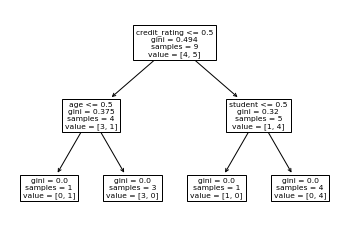

In [27]:
from sklearn import tree
tree.plot_tree(dtree, feature_names=features)